# Employee Turnover Analytics
*Employee turnover* refers to the total number of workers who leave a company over time.

### Create ML programs to:
- Perform data quality checks by checking for missing values, if any.
- Understand what factors contributed most to employee turnover at EDA.
- Perform clustering of employees who left based on their satisfaction and evaluation.
- Handle the left Class Imbalance using the SMOTE technique.
- Perform k-fold cross-validation model training and evaluate performance.
- Identify the best model and justify the evaluation metrics used.
- Suggest various retention strategies for targeted employees.


**Note:** You can identify project asks by ⭐.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
file_path = "/content/HR_comma_sep.csv"
df= pd.read_csv(file_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
from typing import List

def get_outliers(df:pd.DataFrame)->None:
  for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    outliers = df[(df[col]>ub) | (df[col]<lb)][col].shape
    print(f"Outlier in {col}:{outliers}")

def categorical_col_visualize(cols:List[str], df:pd.DataFrame)->None:
  for col in cols:
    unique_vals = df[col].unique()

    if len(unique_vals) < 30: #assuming we will consider column a categorical if it contains less than 30 unique values
      print(f"Unique values in {col}:\n{unique_vals} ")

def data_observations(df:pd.DataFrame)->None:
  columns =df.columns
  num_cols = df.select_dtypes(include=['number']).columns
  non_num_cols=df.select_dtypes(exclude=['number']).columns

  print(f"Shape:{df.shape}\n\n")

  print(f"Null:\n{df.isnull().sum()}\n\n")
  print(f"Duplicates:{df.duplicated().sum()}\n\n")
  get_outliers(df)

  print(f"Total columns({len(columns)}):\n{df.columns.values}\n\n")
  print(f"Numeric cols({len(num_cols)}):\n{num_cols.values}\n\n")
  print(f"Non Numeric cols({len(non_num_cols)}):\n{non_num_cols.values}\n\n")

  if len(non_num_cols):
    categorical_col_visualize(non_num_cols, df)


data_observations(df)

Shape:(14999, 10)


Null:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


Duplicates:3008


Outlier in satisfaction_level:(0,)
Outlier in last_evaluation:(0,)
Outlier in number_project:(0,)
Outlier in average_montly_hours:(0,)
Outlier in time_spend_company:(1282,)
Outlier in Work_accident:(2169,)
Outlier in left:(3571,)
Outlier in promotion_last_5years:(319,)
Total columns(10):
['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


Numeric cols(8):
['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years']


Non Numeric cols(2):
['sales' 'salary']




### **Summary Report**  

#### **Dataset Overview**  
- **Shape:** (14,999 rows, 10 columns)  
- **Duplicate Rows:** 3,008(Since the duplicates contain valuable variations, we will not remove them)
- ⭐**Missing Values:** None (All columns have 0 null values)  

#### **Column Classification**  
- **Numeric Columns (8):**  
  - `satisfaction_level`, `last_evaluation`, `number_project`, `average_montly_hours`, `time_spend_company`, `Work_accident`, `left`, `promotion_last_5years`  
- **Non-Numeric Columns (2):**  
  - `sales`, `salary`  

#### **Outlier Detection**  
- **Columns with Outliers:**  
  - `time_spend_company`: 1,282 outliers  
  - `Work_accident`: 2,169 outliers  
  - `left`: 3,571 outliers  
  - `promotion_last_5years`: 319 outliers  
- **No Outliers Found In:**  
  - `satisfaction_level`, `last_evaluation`, `number_project`, `average_montly_hours`  

#### **Categorical Columns**  
- **Sales Department (`sales`):**  
  - Categories: `['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']`  
- **Salary Levels (`salary`):**  
  - Categories: `['low', 'medium', 'high']`

### ⭐ Data Visualization

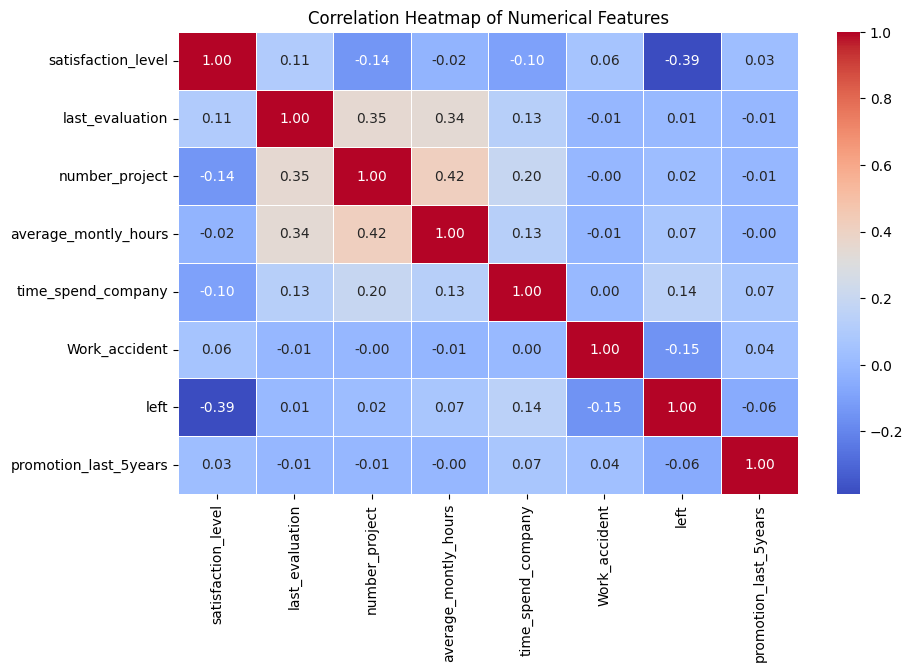

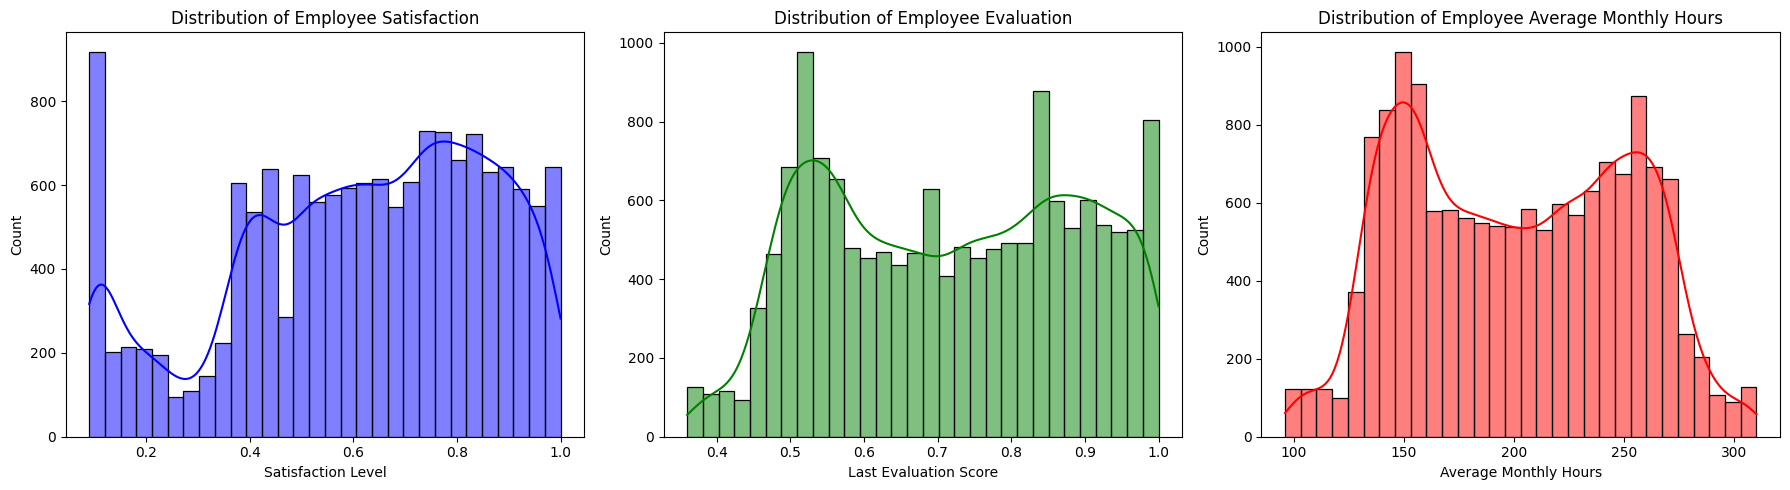

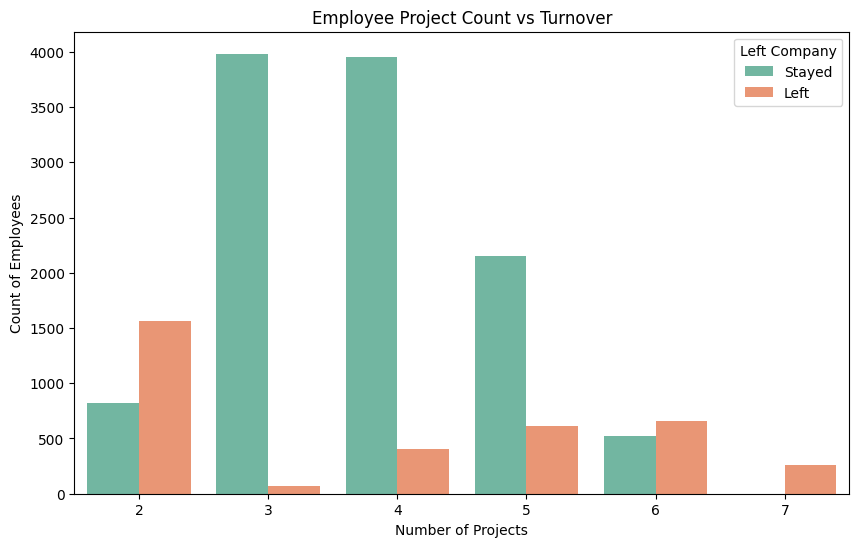

In [21]:
visualization_df = df.select_dtypes(include=["number"])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = visualization_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Distribution Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(visualization_df['satisfaction_level'], kde=True, ax=axes[0], bins=30, color='blue')
axes[0].set_title("Distribution of Employee Satisfaction")
axes[0].set_xlabel("Satisfaction Level")

sns.histplot(visualization_df['last_evaluation'], kde=True, ax=axes[1], bins=30, color='green')
axes[1].set_title("Distribution of Employee Evaluation")
axes[1].set_xlabel("Last Evaluation Score")

sns.histplot(visualization_df['average_montly_hours'], kde=True, ax=axes[2], bins=30, color='red')
axes[2].set_title("Distribution of Employee Average Monthly Hours")
axes[2].set_xlabel("Average Monthly Hours")

plt.tight_layout()
plt.show()

# Bar Plot: Project Count vs Employee Turnover
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=visualization_df, palette="Set2")
plt.title("Employee Project Count vs Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Count of Employees")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()


### ⭐ Clustering
Perform clustering of employees who left based on their satisfaction and evaluation

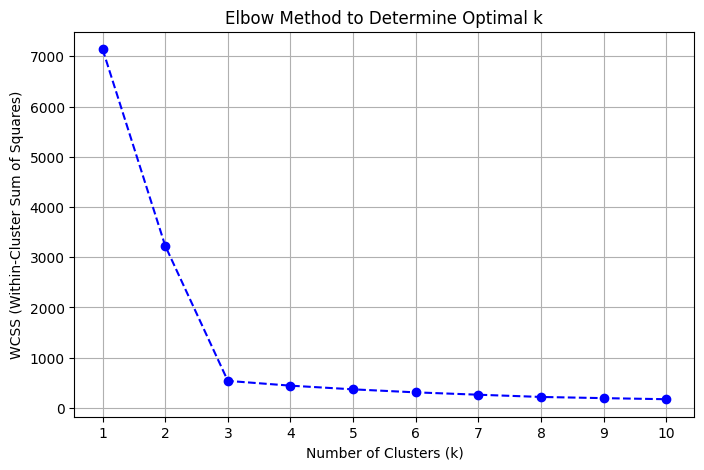

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
left_employees = visualization_df[visualization_df['left'] == 1][['satisfaction_level', 'last_evaluation']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(left_employees)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

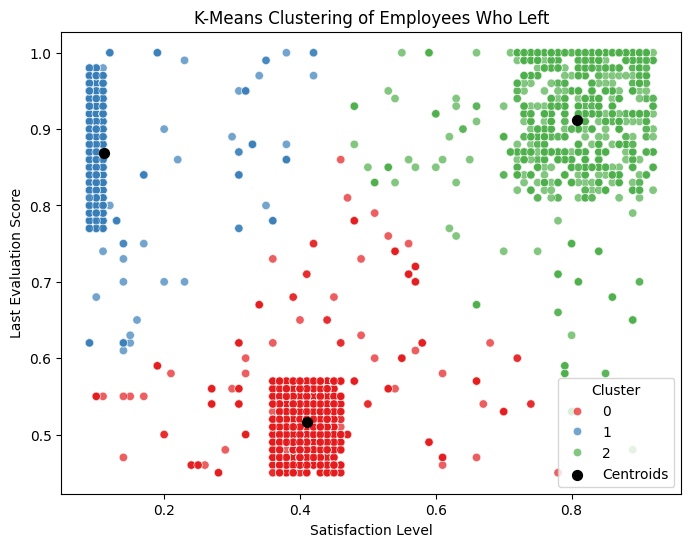

array([[ 4.10145455e-01,  5.16981818e-01, -1.82076576e-14],
       [ 1.11154661e-01,  8.69300847e-01,  2.00000000e+00],
       [ 8.08515865e-01,  9.11709314e-01,  1.00000000e+00]])

In [29]:
# we will use 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
left_employees['Cluster'] = kmeans.fit_predict(left_employees)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=left_employees['satisfaction_level'],
                y=left_employees['last_evaluation'],
                hue=left_employees['Cluster'],
                palette="Set1",
                alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='o', s=50, label="Centroids")
plt.title("K-Means Clustering of Employees Who Left")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation Score")
plt.legend(title="Cluster")
plt.show()

cluster_centers = kmeans.cluster_centers_
cluster_centers

### Data preparation

In [37]:
# ⭐ Convert categorical data to numerical

df_cat_convert = pd.get_dummies(df[['sales', 'salary']]).astype(int)

df_final = pd.concat([df.drop(columns=['sales', 'salary']), df_cat_convert], axis=1)

In [38]:
# Sepearate dependant & independant variables

X = df_final.drop(columns=['left'])
y = df_final['left']

X.shape, y.shape

((14999, 20), (14999,))

In [41]:
from sklearn.model_selection import train_test_split

# ⭐ Define random state to 123
random_state = 123

# split test & train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=random_state, stratify=y)

In [40]:
from imblearn.over_sampling import SMOTE

# ⭐ Run SMOTE to balance the training dataset
smote = SMOTE(random_state=random_state)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

,count
left,
1,9142
0,9142


### Cross validation & evaluation

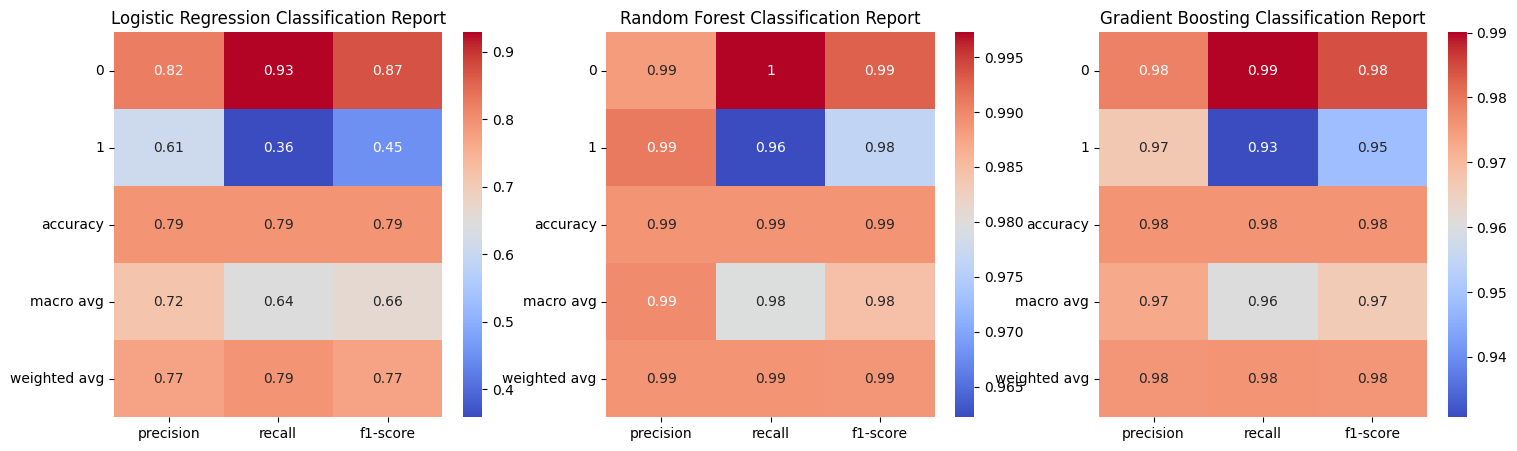

In [69]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,roc_curve, auc, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=random_state)
}

classification = {}

for model_name, model in models.items():
    # classification
    y_pred_cls = cross_val_predict(model, X, y, cv=5)
    classification[model_name] = classification_report(y, y_pred_cls, output_dict=True)

# Plot classification reports as heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (model_name, report) in enumerate(classification.items()):
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"{model_name} Classification Report")

plt.show()

### ⭐ Result

**RandomForestClassifier** performs the best with the highest accuracy, precision, and recall for both classes.

In [74]:
best_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
best_model.fit(X_train, y_train)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

y_pred_cm = best_model.predict(X_test)
cm=confusion_matrix(y_test, y_pred_cm)

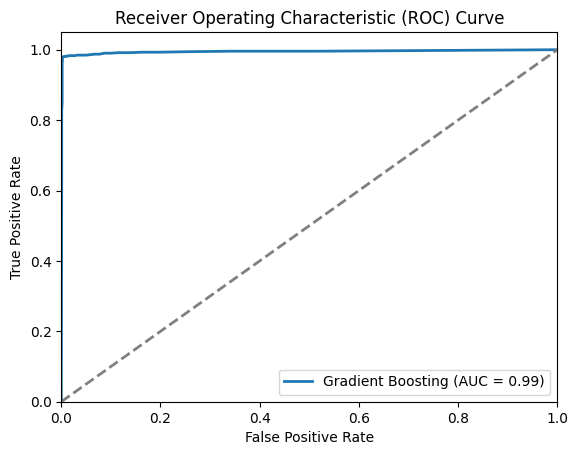

In [75]:
# ⭐ plot roc auc curve
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

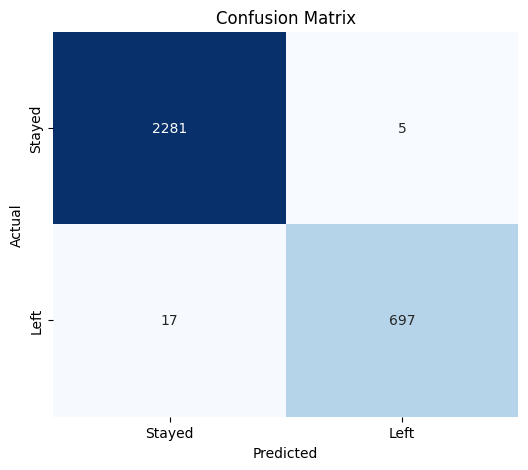

In [76]:
# ⭐ plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

⭐ For employee turnover prediction, **recall** is more important because we want to identify as many employees who are leaving as possible to take action before they actually leave.

### Hyperparameter tunning

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=random_state)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
203 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9889157635125747


In [87]:
# Train the best model on the full training set
best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[2281    5]
 [  17  697]]


##### No further `improvement` on model observed after hyperparameter tunning as well

### Employee turn over

In [84]:
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

employee_turnover_scores = pd.DataFrame({
    'Employee': X_test.index,
    'Turnover Probability': y_pred_prob_rf
})


def categorize_employee(probability):
    if probability < 0.20:
        return 'Safe'
    elif 0.20 <= probability < 0.60:
        return 'Low'
    elif 0.60 <= probability < 0.90:
        return 'Medium'
    else:
        return 'High'

employee_turnover_scores['Zone'] = employee_turnover_scores['Turnover Probability'].apply(categorize_employee)

<ipython-input-86-c83e541bb716>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Zone', data=employee_turnover_scores, palette=colors)


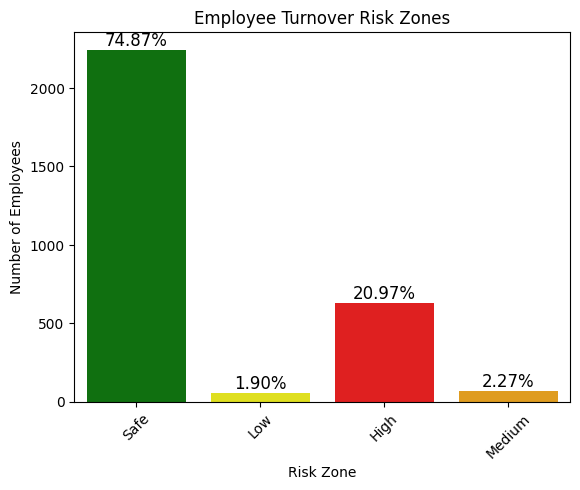

In [86]:
# ⭐ Plot employee turn over accordingl to risk
colors={
    "Safe":"green",
    "Low":"yellow",
    "Medium":"orange",
    "High":"red"
}

zone_counts = employee_turnover_scores['Zone'].value_counts(normalize=True) * 100
zone_counts = zone_counts.sort_index()

ax = sns.countplot(x='Zone', data=employee_turnover_scores, palette=colors)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_pos = p.get_x() + width / 2
    y_pos = height
    percentage = (height / len(employee_turnover_scores)) * 100
    ax.annotate(f'{percentage:.2f}%', (x_pos, y_pos), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Employee Turnover Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()